<a href="https://colab.research.google.com/github/JminJ/GSM_Project_VitA/blob/AI/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [3]:
import librosa
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

### ffmpeg-python 다운로드 (librosa load 에러 방지)

In [2]:
!pip install ffmpeg-python

## 데이터 저장 폴더 자동생성 코드


In [ ]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
            
    except OSError:
        print ('Error: Creating directory. ' +  directory)
 
createFolder('/content/datas')
createFolder('/content/datas/air_conditioner')
createFolder('/content/datas/car_horn')
createFolder('/content/datas/children_playing')
createFolder('/content/datas/dog_bark')
createFolder('/content/datas/drilling')
createFolder('/content/datas/engine_idling')
createFolder('/content/datas/gun_shot')
createFolder('/content/datas/jackhammer')
createFolder('/content/datas/siren')
createFolder('/content/datas/street_music')

## 소리 데이터 전처리 코드

In [12]:
def mfcc(fir_file):
  y, sr = librosa.load(fir_file, sr = 16000)

  D = np.abs(librosa.stft(y, n_fft = 4096, win_length = 4096, hop_length = 2028))
  mfcc = librosa.feature.mfcc(S = librosa.power_to_db(D), sr = sr, n_mfcc = 20)

  # delta2_mfcc = librosa.feature.delta(mfcc, order=2)

  return mfcc

In [13]:
def make_show_save(mfcc, fir_file):
  # download_path = '/content/drive/MyDrive/GSM_Festival_2020_datas'
  download_path = '/content/datas'
  fig = plt.figure(figsize=(12, 4))
  plt.axis('off')

  x = 320 / fig.dpi
  y = 240 / fig.dpi

  fig.set_figwidth(x)
  fig.set_figheight(y)

  fig1 = plt.gcf()
  librosa.display.specshow(mfcc)

  for i in range(10):
    file_list_D = os.listdir(download_path)

    fir_class = fir_file[28:].split('-')
    class_id = int(fir_class[1])
    if class_id == i:
      this_list_length = len(os.listdir(download_path+'/'+file_list_D[i]))
      fig = plt.figure(figsize=(12, 4))
      plt.axis('off')

      x = 320 / fig.dpi
      y = 240 / fig.dpi

      fig.set_figwidth(x)
      fig.set_figheight(y)

      fig1 = plt.gcf()
      librosa.display.specshow(mfcc)

      fig1.savefig(download_path+'/'+file_list_D[i]+'/'+file_list_D[i]+'_'+str(this_list_length), bbox_inches='tight', transparent=True, pad_inches = 0)
      plt.close('all')
    else:
      pass

In [ ]:
# 473 에서 에러
for_nums = [3, 5, 7, 9]
path = '/content/drive/MyDrive/audio'
a = 0
for i in for_nums:
  file_list = os.listdir(path)

  path_now = path+'/'+file_list[i]
  print(file_list[i])
  file_list2 = os.listdir(path_now)

  print('--------------------'+path_now+'----------------------')

  for j in file_list2:
    if j == '.DS_Store':
      continue
    a += 1
    print(a)
    fir_file = path_now+'/'+j
    print(fir_file)
    mfcc2 = mfcc(fir_file)
    make_show_save(mfcc2, fir_file)

fold8
--------------------/content/drive/MyDrive/audio/fold8----------------------
1
/content/drive/MyDrive/audio/fold8/168037-4-0-0.wav
2
/content/drive/MyDrive/audio/fold8/168037-4-11-0.wav
3
/content/drive/MyDrive/audio/fold8/16860-9-0-26.wav
4
/content/drive/MyDrive/audio/fold8/16860-9-0-30.wav
5
/content/drive/MyDrive/audio/fold8/168037-4-1-0.wav
6
/content/drive/MyDrive/audio/fold8/167702-4-8-0.wav
7
/content/drive/MyDrive/audio/fold8/16860-9-0-45.wav
8
/content/drive/MyDrive/audio/fold8/168037-4-10-0.wav
9
/content/drive/MyDrive/audio/fold8/169043-2-0-28.wav
10
/content/drive/MyDrive/audio/fold8/169043-2-0-10.wav
11
/content/drive/MyDrive/audio/fold8/169043-2-0-15.wav
12
/content/drive/MyDrive/audio/fold8/169043-2-0-24.wav
13
/content/drive/MyDrive/audio/fold8/169043-2-0-13.wav
14
/content/drive/MyDrive/audio/fold8/169043-2-0-21.wav
15
/content/drive/MyDrive/audio/fold8/169043-2-0-3.wav
16
/content/drive/MyDrive/audio/fold8/170022-0-0-0.wav
17
/content/drive/MyDrive/audio/fold8/

## 연습코드


In [ ]:
'''
path = '/content/drive/MyDrive/audio'
file_list = os.listdir(path)
print('{}'.format(file_list))

path_now = path+'/'+file_list[5]
print(path_now)
file_list = os.listdir(path_now)
print(file_list[0])
fir_file = path_now+'/'+file_list[0]
print(fir_file)
print(fir_file[42])
'''

['.DS_Store', 'fold5', 'fold1', 'fold8', 'fold4', 'fold6', 'fold3', 'fold7', 'fold10', 'fold9', 'fold2']
/content/drive/MyDrive/audio/fold6
184805-0-0-40.wav
/content/drive/MyDrive/audio/fold6/184805-0-0-40.wav
0


In [6]:
ex_file = '/content/drive/MyDrive/audio/fold8/95549-3-0-20.wav'

y, sr = librosa.load(ex_file, sr = 16000)
print(sr)
D = np.abs(librosa.stft(y, n_fft = 4096, win_length = 4096, hop_length = 2028))
mfcc = librosa.feature.mfcc(S = librosa.power_to_db(D), sr = sr, n_mfcc = 20)
print(type(mfcc))
#print(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)
print(type(delta2_mfcc))

16000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


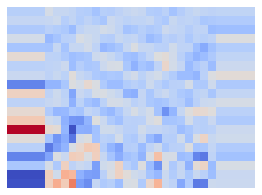

In [7]:
fig = plt.figure(figsize=(12, 4))
plt.axis('off')

x = 320 / fig.dpi
y = 240 / fig.dpi

fig.set_figwidth(x)
fig.set_figheight(y)

fig1 = plt.gcf()
# plt.tight_layout()
# plt.imshow(delta2_mfcc.T, aspect='auto', origin='lower')
librosa.display.specshow(delta2_mfcc)

In [ ]:
fig1.savefig('/content/data6/dog_2.png', bbox_inches='tight', transparent=True, pad_inches = 0)
plt.close('all')

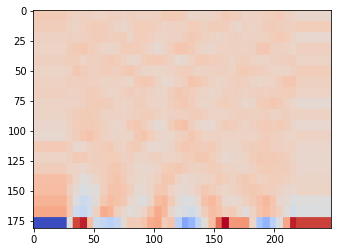

In [ ]:
# 이미지 출력 코드 #
from PIL import Image

pil_im = Image.open('/content/data6/dog_2.png', 'r')
plt.imshow(pil_im)

In [ ]:
################## practice ######################

# path = '/content/drive/MyDrive/audio/fold8/175856-1-0-0.wav'
# path = '/content/drive/MyDrive/audio/fold8/175856-1-1-0.wav'
a = path[28:].split('-')
b = int(a[1])
print(b)
print(type(b))

dddd_prac = mfcc(path)

make_show_save(dddd_prac, path)


In [8]:
################## practice ######################

download_path = '/content/datas'
list = os.listdir(download_path)
print(list)

['street_music', 'jackhammer', 'children_playing', 'gun_shot', 'engine_idling', 'drilling', 'air_conditioner', '.ipynb_checkpoints', 'car_horn', 'siren', 'dog_bark']
